# Research Question: What Drives Hospital Performances? Analysing the Role of Patient Experiences and Predicting Hospital Success in CMS HVBP Score

In [1]:
# Data manipulation and visualization libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Statistical modeling libraries
import statsmodels.api as sm
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error

# Data Exploration

<p> I prefer to explore each dataset one by one because I think it will give me more control to the data </p>

In [2]:
df_clinical_care = pd.read_csv('https://raw.githubusercontent.com/osoliman/Chapter6_HTM737/refs/heads/main/hvbp_clinical_care_11_07_2017.csv')
df_clinical_care.head()

,Provider Number,Hospital Name,Address,City,State,ZIP Code,County Name,MORT-30-AMI Achievement Threshold,MORT-30-AMI Benchmark,MORT-30-AMI Baseline Rate,...,MORT-30-HF Achievement Points,MORT-30-HF Improvement Points,MORT-30-HF Measure Score,MORT-30-PN Achievement Threshold,MORT-30-PN Benchmark,MORT-30-PN Baseline Rate,MORT-30-PN Performance Rate,MORT-30-PN Achievement Points,MORT-30-PN Improvement Points,MORT-30-PN Measure Score
0,10001,SOUTHEAST ALABAMA MEDICAL CENTER,1108 ROSS CLARK CIRCLE,DOTHAN,AL,36301,Houston,0.850916,0.873053,0.850186,...,1 out of 10,0 out of 9,1 out of 10,0.88286,0.9079,0.877181,0.893777,4 out of 10,5 out of 9,5 out of 10
1,10005,MARSHALL MEDICAL CENTER SOUTH,2505 U S HIGHWAY 431 NORTH,BOAZ,AL,35957,Marshall,0.850916,0.873053,0.836946,...,0 out of 10,0 out of 9,0 out of 10,0.88286,0.9079,0.858520,0.851953,0 out of 10,0 out of 9,0 out of 10
2,10006,ELIZA COFFEE MEMORIAL HOSPITAL,205 MARENGO STREET,FLORENCE,AL,35631,Lauderdale,0.850916,0.873053,0.818278,...,0 out of 10,0 out of 9,0 out of 10,0.88286,0.9079,0.848835,0.872522,0 out of 10,4 out of 9,4 out of 10
3,10007,MIZELL MEMORIAL HOSPITAL,702 N MAIN ST,OPP,AL,36467,Covington,0.850916,0.873053,0.843930,...,0 out of 10,0 out of 9,0 out of 10,0.88286,0.9079,0.836245,0.849107,0 out of 10,1 out of 9,1 out of 10
4,10011,ST VINCENT'S EAST,50 MEDICAL PARK EAST DRIVE,BIRMINGHAM,AL,35235,Jefferson,0.850916,0.873053,0.834080,...,0 out of 10,0 out of 9,0 out of 10,0.88286,0.9079,0.823954,0.883768,1 out of 10,7 out of 9,7 out of 10


In [3]:
#check the data types and non-null counts
df_clinical_care.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2808 entries, 0 to 2807
Data columns (total 28 columns):
 #   Column                             Non-Null Count  Dtype  
---  ------                             --------------  -----  
 0   Provider Number                    2808 non-null   int64  
 1   Hospital Name                      2808 non-null   object 
 2   Address                            2808 non-null   object 
 3   City                               2808 non-null   object 
 4   State                              2808 non-null   object 
 5   ZIP Code                           2808 non-null   int64  
 6   County Name                        2807 non-null   object 
 7   MORT-30-AMI Achievement Threshold  2808 non-null   float64
 8   MORT-30-AMI Benchmark              2808 non-null   float64
 9   MORT-30-AMI Baseline Rate          2808 non-null   object 
 10  MORT-30-AMI Performance Rate       2808 non-null   object 
 11  MORT-30-AMI Achievement Points     2808 non-null   objec

In [4]:
df_efficiency = pd.read_csv('https://raw.githubusercontent.com/osoliman/Chapter6_HTM737/refs/heads/main/hvbp_efficiency_11_07_2017.csv')
df_efficiency.head()

,Provider_Number,Hospital_Name,Address,City,State,ZIP_Code,County_Name,MSPB-1 Achievement Threshold,MSPB-1 Benchmark,MSPB-1 Baseline Rate,MSPB-1 Performance Rate,MSPB-1 Achievement Points,MSPB-1 Improvement Points,MSPB-1 Measure Score
0,110215,PIEDMONT FAYETTE HOSPITAL,1255 HIGHWAY 54 WEST,FAYETTEVILLE,GA,30214,Fayette,0.985777,0.832678,0.950527,0.962057,2 out of 10,0 out of 9,2 out of 10
1,230236,METRO HEALTH HOSPITAL,"5900 BYRON CENTER AVENUE, SW",WYOMING,MI,49519,Kent,0.985777,0.832678,0.921788,0.939953,3 out of 10,0 out of 9,3 out of 10
2,520019,MINISTRY SAINT MARYS HOSPITAL,2251 NORTH SHORE DR,RHINELANDER,WI,54501,Oneida,0.985777,0.832678,0.843599,0.832790,9 out of 10,9 out of 9,9 out of 10
3,340141,NEW HANOVER REGIONAL MEDICAL CENTER,2131 S 17TH ST BOX 9000,WILMINGTON,NC,28402,New Hanover,0.985777,0.832678,0.966919,0.967548,2 out of 10,0 out of 9,2 out of 10
4,200020,YORK HOSPITAL,15 HOSPITAL DRIVE,YORK,ME,3909,York,0.985777,0.832678,0.966664,0.970079,1 out of 10,0 out of 9,1 out of 10


In [5]:
df_efficiency.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2808 entries, 0 to 2807
Data columns (total 14 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   Provider_Number               2808 non-null   int64  
 1   Hospital_Name                 2808 non-null   object 
 2   Address                       2808 non-null   object 
 3   City                          2808 non-null   object 
 4   State                         2808 non-null   object 
 5   ZIP_Code                      2808 non-null   int64  
 6   County_Name                   2807 non-null   object 
 7   MSPB-1 Achievement Threshold  2808 non-null   float64
 8   MSPB-1 Benchmark              2808 non-null   float64
 9   MSPB-1 Baseline Rate          2808 non-null   object 
 10  MSPB-1 Performance Rate       2808 non-null   float64
 11  MSPB-1 Achievement Points     2808 non-null   object 
 12  MSPB-1 Improvement Points     2808 non-null   object 
 13  MSP

In [6]:
df_hcahps = pd.read_csv('https://raw.githubusercontent.com/osoliman/Chapter6_HTM737/refs/heads/main/hvbp_hcahps_11_07_2017.csv')
df_hcahps.head()

,Provider Number,Hospital Name,Address,City,State,ZIP Code,County Name,Communication with Nurses Floor,Communication with Nurses Achievement Threshold,Communication with Nurses Benchmark,...,Overall Rating of Hospital Floor,Overall Rating of Hospital Achievement Threshold,Overall Rating of Hospital Benchmark,Overall Rating of Hospital Baseline Rate,Overall Rating of Hospital Performance Rate,Overall Rating of Hospital Achievement Points,Overall Rating of Hospital Improvement Points,Overall Rating of Hospital Dimension Score,HCAHPS Base Score,HCAHPS Consistency Score
0,240040,UNIVERSITY MEDICAL CENTER-MESABI/ MESABA CLINICS,750 EAST 34TH ST,HIBBING,MN,55746,Saint Louis,55.27,78.52,86.68,...,37.67,70.23,84.58,69.20,72.81,2 out of 10,2 out of 9,2 out of 10,29,19
1,450055,ROLLING PLAINS MEMORIAL HOSPITAL,200 E ARIZONA,SWEETWATER,TX,79556,Nolan,55.27,78.52,86.68,...,37.67,70.23,84.58,73.47,79.06,6 out of 10,5 out of 9,6 out of 10,49,20
2,50367,NORTHBAY MEDICAL CENTER,1200 B GALE WILSON BLVD,FAIRFIELD,CA,94533,Solano,55.27,78.52,86.68,...,37.67,70.23,84.58,69.92,71.60,1 out of 10,1 out of 9,1 out of 10,10,13
3,360096,EAST LIVERPOOL CITY HOSPITAL,425 WEST 5TH STREET,EAST LIVERPOOL,OH,43920,Columbiana,55.27,78.52,86.68,...,37.67,70.23,84.58,60.70,70.32,1 out of 10,4 out of 9,4 out of 10,29,16
4,230130,"BEAUMONT HOSPITAL, ROYAL OAK",3601 W THIRTEEN MILE RD,ROYAL OAK,MI,48073,Oakland,55.27,78.52,86.68,...,37.67,70.23,84.58,72.39,73.51,3 out of 10,0 out of 9,3 out of 10,7,14


In [7]:
df_hcahps.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2808 entries, 0 to 2807
Data columns (total 73 columns):
 #   Column                                                                   Non-Null Count  Dtype  
---  ------                                                                   --------------  -----  
 0   Provider Number                                                          2808 non-null   int64  
 1   Hospital Name                                                            2808 non-null   object 
 2   Address                                                                  2808 non-null   object 
 3   City                                                                     2808 non-null   object 
 4   State                                                                    2808 non-null   object 
 5   ZIP Code                                                                 2808 non-null   int64  
 6   County Name                                                             

In [8]:
df_safety = pd.read_csv('https://raw.githubusercontent.com/osoliman/Chapter6_HTM737/refs/heads/main/hvbp_safety_11_07_2017.csv')
df_safety.head()

,Provider Number,Hospital Name,Address,City,State,ZIP Code,County Name,PSI-90 Achievement Threshold,PSI-90 Benchmark,PSI-90 Baseline Rate,...,HAI-6 Achievement Points,HAI-6 Improvement Points,HAI-6 Measure Score,PC-01 Achievement Threshold,PC-01 Benchmark,PC-01 Baseline Rate,PC-01 Performance Rate,PC-01 Achievement Points,PC-01 Improvement Points,PC-01 Measure Score
0,10001,SOUTHEAST ALABAMA MEDICAL CENTER,1108 ROSS CLARK CIRCLE,DOTHAN,AL,36301,Houston,0.964542,0.709498,1.009846,...,6 out of 10,7 out of 9,7 out of 10,0.020408,0.0,0.000000,0.000000,10 out of 10,0 out of 9,10 out of 10
1,10005,MARSHALL MEDICAL CENTER SOUTH,2505 U S HIGHWAY 431 NORTH,BOAZ,AL,35957,Marshall,0.964542,0.709498,0.798330,...,9 out of 10,8 out of 9,9 out of 10,0.020408,0.0,0.295858,0.021739,0 out of 10,9 out of 9,9 out of 10
2,10006,ELIZA COFFEE MEMORIAL HOSPITAL,205 MARENGO STREET,FLORENCE,AL,35631,Lauderdale,0.964542,0.709498,1.253606,...,5 out of 10,3 out of 9,5 out of 10,0.020408,0.0,0.027027,0.000000,10 out of 10,9 out of 9,10 out of 10
3,10007,MIZELL MEMORIAL HOSPITAL,702 N MAIN ST,OPP,AL,36467,Covington,0.964542,0.709498,1.101822,...,Not Available,Not Available,Not Available,0.020408,0.0,Not Available,Not Available,Not Available,Not Available,Not Available
4,10011,ST VINCENT'S EAST,50 MEDICAL PARK EAST DRIVE,BIRMINGHAM,AL,35235,Jefferson,0.964542,0.709498,0.864237,...,3 out of 10,3 out of 9,3 out of 10,0.020408,0.0,0.058824,0.000000,10 out of 10,9 out of 9,10 out of 10


In [9]:
df_safety.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2808 entries, 0 to 2807
Data columns (total 64 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   Provider Number               2808 non-null   int64  
 1   Hospital Name                 2808 non-null   object 
 2   Address                       2808 non-null   object 
 3   City                          2808 non-null   object 
 4   State                         2808 non-null   object 
 5   ZIP Code                      2808 non-null   int64  
 6   County Name                   2807 non-null   object 
 7   PSI-90 Achievement Threshold  2808 non-null   float64
 8   PSI-90 Benchmark              2808 non-null   float64
 9   PSI-90 Baseline Rate          2808 non-null   object 
 10  PSI-90 Performance Rate       2808 non-null   object 
 11  PSI-90 Achievement Points     2808 non-null   object 
 12  PSI-90 Improvement Points     2808 non-null   object 
 13  PSI

In [10]:
df_tps = pd.read_csv('https://raw.githubusercontent.com/osoliman/Chapter6_HTM737/refs/heads/main/hvbp_tps_11_07_2017.csv')
df_tps.head()

,Provider Number,Hospital Name,Address,City,State,Zip Code,County Name,Unweighted Normalized Clinical Care Domain Score,Weighted Normalized Clinical Care Domain Score,Unweighted Patient and Caregiver Centered Experience of Care/Care Coordination Domain Score,Weighted Patient and Caregiver Centered Experience of Care/Care Coordination Domain Score,Unweighted Normalized Safety Domain Score,Weighted Safety Domain Score,Unweighted Normalized Efficiency and Cost Reduction Domain Score,Weighted Efficiency and Cost Reduction Domain Score,Total Performance Score
0,10001,SOUTHEAST ALABAMA MEDICAL CENTER,1108 ROSS CLARK CIRCLE,DOTHAN,AL,36301,Houston,43.333333333333,10.833333333333,26.000000000000,6.500000000000,72.857142857143,18.214285714286,0.000000000000,0.000000000000,35.547619047619
1,10005,MARSHALL MEDICAL CENTER SOUTH,2505 U S HIGHWAY 431 NORTH,BOAZ,AL,35957,Marshall,16.666666666667,4.166666666667,36.000000000000,9.000000000000,81.428571428571,20.357142857143,0.000000000000,0.000000000000,33.523809523810
2,10006,ELIZA COFFEE MEMORIAL HOSPITAL,205 MARENGO STREET,FLORENCE,AL,35631,Lauderdale,26.666666666667,6.666666666667,17.000000000000,4.250000000000,47.142857142857,11.785714285714,0.000000000000,0.000000000000,22.702380952381
3,10007,MIZELL MEMORIAL HOSPITAL,702 N MAIN ST,OPP,AL,36467,Covington,26.666666666667,8.888888888889,56.000000000000,18.666666666667,Not Available,Not Available,0.000000000000,0.000000000000,27.555555555556
4,10011,ST VINCENT'S EAST,50 MEDICAL PARK EAST DRIVE,BIRMINGHAM,AL,35235,Jefferson,46.666666666667,11.666666666667,25.000000000000,6.250000000000,42.857142857143,10.714285714286,0.000000000000,0.000000000000,28.630952380952


In [11]:
df_tps.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2808 entries, 0 to 2807
Data columns (total 16 columns):
 #   Column                                                                                       Non-Null Count  Dtype 
---  ------                                                                                       --------------  ----- 
 0   Provider Number                                                                              2808 non-null   int64 
 1   Hospital Name                                                                                2808 non-null   object
 2   Address                                                                                      2808 non-null   object
 3   City                                                                                         2808 non-null   object
 4   State                                                                                        2808 non-null   object
 5   Zip Code                                 


# Handling Missing Values

These datasets are small but complex, with various missing values scattered across different columns. Instead of brute-forcing and deleting all missing values upfront, we will take a more targeted approach. 

We will first create charts and select specific columns for analysis. As we proceed, we will clean the necessary columns on the go, ensuring that we only address missing values relevant to our analysis. This approach allows for more flexibility and preserves as much data as possible. 


# Plotting Data

### Opening Graph: TPS Distribution

In [12]:
# Select only the columns we need from each dataset

# From TPS: Total Performance Score and domain scores
tps_cols = ['Provider Number', 'Hospital Name', 'State', 'County Name',
            'Total Performance Score',
            'Weighted Normalized Clinical Care Domain Score',
            'Weighted Patient and Caregiver Centered Experience of Care/Care Coordination Domain Score',
            'Weighted Safety Domain Score',
            'Weighted Efficiency and Cost Reduction Domain Score']

df_tps_selected = df_tps[tps_cols].copy() # Create a copy to avoid SettingWithCopyWarning

# Convert TPS columns to numeric
numeric_cols = ['Total Performance Score',
                'Weighted Normalized Clinical Care Domain Score',
                'Weighted Patient and Caregiver Centered Experience of Care/Care Coordination Domain Score',
                'Weighted Safety Domain Score',
                'Weighted Efficiency and Cost Reduction Domain Score']

# Check for missing values in the selected numeric columns
nan_counts = df_tps_selected[numeric_cols].isna().sum()
print("NaN counts in numeric columns:\n", nan_counts)

for col in numeric_cols:
    df_tps_selected[col] = pd.to_numeric(df_tps_selected[col], errors='coerce') # Convert to numeric, setting errors to NaN


NaN counts in numeric columns:
 Total Performance Score                                                                      0
Weighted Normalized Clinical Care Domain Score                                               0
Weighted Patient and Caregiver Centered Experience of Care/Care Coordination Domain Score    0
Weighted Safety Domain Score                                                                 0
Weighted Efficiency and Cost Reduction Domain Score                                          0
dtype: int64


In [13]:
# From HCAHPS: Base Score and Consistency Score
hcahps_cols = ['Provider Number', 'HCAHPS Base Score', 'HCAHPS Consistency Score']
df_hcahps_selected = df_hcahps[hcahps_cols].copy()

# Convert HCAHPS scores to numeric
df_hcahps_selected['HCAHPS Base Score'] = pd.to_numeric(df_hcahps_selected['HCAHPS Base Score'], errors='coerce')
df_hcahps_selected['HCAHPS Consistency Score'] = pd.to_numeric(df_hcahps_selected['HCAHPS Consistency Score'], errors='coerce')

# Calculate total HCAHPS score (Base + Consistency)
df_hcahps_selected['HCAHPS_Score'] = df_hcahps_selected['HCAHPS Base Score'] + df_hcahps_selected['HCAHPS Consistency Score']


In [14]:
# Merge datasets
df_analysis_first_graph = df_tps_selected.merge(df_hcahps_selected[['Provider Number', 'HCAHPS_Score']], 
                                     on='Provider Number', 
                                     how='left')

In [15]:
# Rename columns for clarity
df_analysis_first_graph = df_analysis_first_graph.rename(columns={
    'Total Performance Score': 'Total_Performance_Score',
    'Weighted Normalized Clinical Care Domain Score': 'Clinical_Care_Score',
    'Weighted Patient and Caregiver Centered Experience of Care/Care Coordination Domain Score': 'Patient_Experience_Score',
    'Weighted Safety Domain Score': 'Safety_Score',
    'Weighted Efficiency and Cost Reduction Domain Score': 'Efficiency_Score'
})

# Drop rows where Total Performance Score is missing (key variable)
df_analysis_first_graph = df_analysis_first_graph.dropna(subset=['Total_Performance_Score'])

print("\nMerged dataset created!")
print(f"Shape: {df_analysis_first_graph.shape}")
print(f"\nColumns: {df_analysis_first_graph.columns.tolist()}")
print(f"\nFirst few rows:")
df_analysis_first_graph.head()


Merged dataset created!
Shape: (2807, 10)

Columns: ['Provider Number', 'Hospital Name', 'State', 'County Name', 'Total_Performance_Score', 'Clinical_Care_Score', 'Patient_Experience_Score', 'Safety_Score', 'Efficiency_Score', 'HCAHPS_Score']

First few rows:


,Provider Number,Hospital Name,State,County Name,Total_Performance_Score,Clinical_Care_Score,Patient_Experience_Score,Safety_Score,Efficiency_Score,HCAHPS_Score
0,10001,SOUTHEAST ALABAMA MEDICAL CENTER,AL,Houston,35.547619,10.833333,6.500000,18.214286,0.0,26.0
1,10005,MARSHALL MEDICAL CENTER SOUTH,AL,Marshall,33.523810,4.166667,9.000000,20.357143,0.0,36.0
2,10006,ELIZA COFFEE MEMORIAL HOSPITAL,AL,Lauderdale,22.702381,6.666667,4.250000,11.785714,0.0,17.0
3,10007,MIZELL MEMORIAL HOSPITAL,AL,Covington,27.555556,8.888889,18.666667,NaN,0.0,56.0
4,10011,ST VINCENT'S EAST,AL,Jefferson,28.630952,11.666667,6.250000,10.714286,0.0,25.0


In [16]:
# Get all rows with any missing values in our key columns
key_columns = ['Total_Performance_Score', 'HCAHPS_Score', 'Clinical_Care_Score', 
               'Safety_Score', 'Efficiency_Score', 'Patient_Experience_Score']

# Find rows with at least one missing value
rows_with_missing = df_analysis_first_graph[df_analysis_first_graph[key_columns].isnull().any(axis=1)]

print(f"Total rows with missing data: {len(rows_with_missing)}")
print(f"Total rows in dataset: {len(df_analysis_first_graph)}")
print(f"Percentage with missing data: {len(rows_with_missing)/len(df_analysis_first_graph)*100:.2f}%")
print("\n" + "="*100)

# Display all rows with missing values
display_columns = ['Provider Number', 'Hospital Name', 'State', 'County Name',
                   'Total_Performance_Score', 'HCAHPS_Score', 'Clinical_Care_Score', 
                   'Safety_Score', 'Efficiency_Score', 'Patient_Experience_Score']

print("\nAll hospitals with missing data:")
print("="*100)

for idx, row in rows_with_missing.iterrows():
    print(f"\nRow {idx}:")
    print(f"Provider: {row['Provider Number']} | Hospital: {row['Hospital Name']}")
    print(f"Location: {row['County Name']}, {row['State']}")
    print(f"Total Performance Score: {row['Total_Performance_Score']}")
    print(f"HCAHPS Score: {row['HCAHPS_Score']}")
    print(f"Clinical Care Score: {row['Clinical_Care_Score']}")
    print(f"Safety Score: {row['Safety_Score']}")
    print(f"Efficiency Score: {row['Efficiency_Score']}")
    print(f"Patient Experience Score: {row['Patient_Experience_Score']}")
    print("-"*100)

Total rows with missing data: 273
Total rows in dataset: 2807
Percentage with missing data: 9.73%


All hospitals with missing data:

Row 3:
Provider: 10007 | Hospital: MIZELL MEMORIAL HOSPITAL
Location: Covington, AL
Total Performance Score: 27.555555555556
HCAHPS Score: 56.0
Clinical Care Score: 8.888888888889
Safety Score: nan
Efficiency Score: 0.0
Patient Experience Score: 18.666666666667
----------------------------------------------------------------------------------------------------

Row 8:
Provider: 10021 | Hospital: DALE MEDICAL CENTER
Location: Dale, AL
Total Performance Score: 36.333333333333
HCAHPS Score: 64.0
Clinical Care Score: 5.0
Safety Score: nan
Efficiency Score: 10.0
Patient Experience Score: 21.333333333333
----------------------------------------------------------------------------------------------------

Row 9:
Provider: 10022 | Hospital: CHEROKEE MEDICAL CENTER
Location: Cherokee, AL
Total Performance Score: 34.333333333333
HCAHPS Score: 53.0
Clinical Care Sc

We observed that dropping all rows with missing values would reduce the dataset by approximately 10%, which is significant given the dataset's size. 

Interestingly, all missing data pertain to the Total Performance Score calculation, with exactly one of the four domain scores missing in each case. To address this, we will reverse the formula for Total Performance Score to calculate and fill the missing values.

In [17]:
# Function to fill missing domain scores based on Total Performance Score
# We know that: Total = Clinical_Care_Score + Patient_Experience_Score + Safety_Score + Efficiency_Score
# By this fuunction we will goes through each row with missing values and fill in the missing domain score
def fill_missing_from_total(df):

    df_filled = df.copy()
    filled_count = 0

    for idx in df_filled.index:
        # Skip if no Total Performance Score
        if pd.isna(df_filled.loc[idx, 'Total_Performance_Score']):
            continue
            
        total = df_filled.loc[idx, 'Total_Performance_Score']
        
        # Get domain scores
        clinical = df_filled.loc[idx, 'Clinical_Care_Score']
        patient_exp = df_filled.loc[idx, 'Patient_Experience_Score']
        safety = df_filled.loc[idx, 'Safety_Score']
        efficiency = df_filled.loc[idx, 'Efficiency_Score']
        
        # Count missing
        missing = []
        if pd.isna(clinical):
            missing.append('Clinical_Care_Score')
        if pd.isna(patient_exp):
            missing.append('Patient_Experience_Score')
        if pd.isna(safety):
            missing.append('Safety_Score')
        if pd.isna(efficiency):
            missing.append('Efficiency_Score')
        
        # Only fill if exactly ONE is missing
        # Even though we expect only one missing based on prior analysis, we add this check for safety
        if len(missing) == 1:
            # Calculate sum of available scores
            available_sum = 0
            if pd.notna(clinical):
                available_sum += clinical
            if pd.notna(patient_exp):
                available_sum += patient_exp
            if pd.notna(safety):
                available_sum += safety
            if pd.notna(efficiency):
                available_sum += efficiency
            
            # Calculate missing value
            missing_value = total - available_sum
            missing_col = missing[0]
            
            df_filled.loc[idx, missing_col] = missing_value
            filled_count += 1
            
            # Show all fixed values 
            print(f"Row {idx} ({df_filled.loc[idx, 'Hospital Name']}): Filled {missing_col} = {missing_value:.6f}")
    
    print(f"\n{'='*100}")
    print(f"Total values filled: {filled_count}")
    return df_filled

# Apply the function
print("Filling missing domain scores...")
print("="*100)
df_analysis_first_graph = fill_missing_from_total(df_analysis_first_graph)

# Verify results
print("\nMissing values after filling:")
for col in ['Clinical_Care_Score', 'Patient_Experience_Score', 'Safety_Score', 'Efficiency_Score']:
    missing = df_analysis_first_graph[col].isnull().sum()
    print(f"{col}: {missing}")

Filling missing domain scores...
Row 3 (MIZELL MEMORIAL HOSPITAL): Filled Safety_Score = 0.000000
Row 8 (DALE MEDICAL CENTER): Filled Safety_Score = 0.000000
Row 9 (CHEROKEE MEDICAL CENTER): Filled Safety_Score = 0.000000
Row 14 (COMMUNITY HOSPITAL INC): Filled Safety_Score = 0.000000
Row 20 (MARION REGIONAL MEDICAL CENTER): Filled Safety_Score = 0.000000
Row 21 (FAYETTE MEDICAL CENTER): Filled Safety_Score = 0.000000
Row 26 (LAWRENCE MEDICAL CENTER): Filled Safety_Score = 0.000000
Row 28 (WIREGRASS MEDICAL CENTER): Filled Safety_Score = 0.000000
Row 30 (MEDICAL CENTER BARBOUR): Filled Safety_Score = 0.000000
Row 31 (CLAY COUNTY HOSPITAL): Filled Safety_Score = 0.000000
Row 36 (NORTHWEST MEDICAL CENTER): Filled Safety_Score = 0.000000
Row 37 (UNIVERSITY OF SOUTH ALABAMA MEDICAL CENTER): Filled Clinical_Care_Score = 0.000000
Row 42 (ELMORE COMMUNITY HOSPITAL): Filled Safety_Score = 0.000000
Row 49 (BRYAN W. WHITFIELD MEMORIAL HOSPITAL): Filled Safety_Score = 0.000000
Row 54 (LAKELAND CO

Oddly, all the missing values seem to return as 0. This might indicate that CMS has chosen to represent missing data as "not available" and exclude it from the formula calculations. While we are not certain, this could potentially explain the observed behavior.

We have successfully completed the data cleaning process for the first graph. Now, let us proceed to plot it.

Total Performance Score Distribution Analysis
Number of hospitals: 2807
Mean: 37.43
Median: 36.33
Std Dev: 11.37
Min: 6.00
Max: 87.33
Range: 81.33

Quartiles:
Q1 (25th percentile): 29.27
Q2 (Median): 36.33
Q3 (75th percentile): 44.17
IQR: 14.90


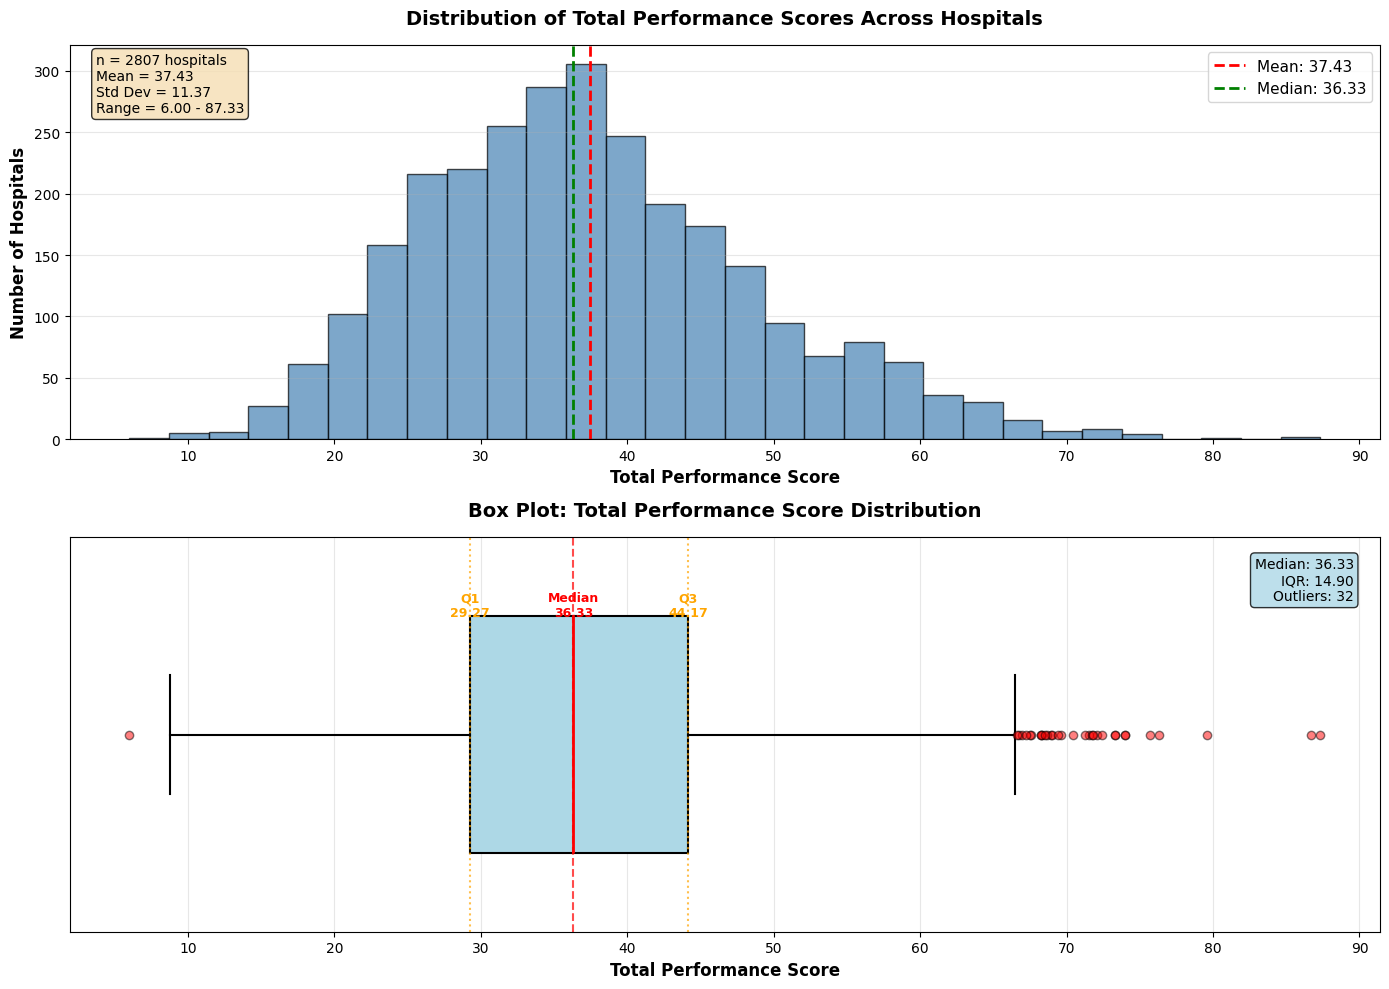


Interpretation:

Skewness: 0.540
  → Distribution is right-skewed (tail extends to the right)

Outliers detected: 32 hospitals (1.1%)
  Outlier range: 6.00 to 87.33

✓ The typical hospital scores between 29.27 and 44.17 points
✓ 50% of hospitals score above 36.33
✓ The spread of scores (IQR) is 14.90 points


In [31]:
# Create TPS Distribution visualization
fig, axes = plt.subplots(2, 1, figsize=(14, 10))

# Get TPS data
tps_data = df_analysis_first_graph['Total_Performance_Score'].dropna()

print(f"Total Performance Score Distribution Analysis")
print("="*80)
print(f"Number of hospitals: {len(tps_data)}")
print(f"Mean: {tps_data.mean():.2f}")
print(f"Median: {tps_data.median():.2f}")
print(f"Std Dev: {tps_data.std():.2f}")
print(f"Min: {tps_data.min():.2f}")
print(f"Max: {tps_data.max():.2f}")
print(f"Range: {tps_data.max() - tps_data.min():.2f}")

# Calculate quartiles
q1 = tps_data.quantile(0.25)
q3 = tps_data.quantile(0.75)
iqr = q3 - q1

print(f"\nQuartiles:")
print(f"Q1 (25th percentile): {q1:.2f}")
print(f"Q2 (Median): {tps_data.median():.2f}")
print(f"Q3 (75th percentile): {q3:.2f}")
print(f"IQR: {iqr:.2f}")

# --- HISTOGRAM (Top panel) ---
axes[0].hist(tps_data, bins=30, color='steelblue', edgecolor='black', alpha=0.7)

# Add mean and median lines
axes[0].axvline(tps_data.mean(), color='red', linestyle='--', linewidth=2, label=f'Mean: {tps_data.mean():.2f}')
axes[0].axvline(tps_data.median(), color='green', linestyle='--', linewidth=2, label=f'Median: {tps_data.median():.2f}')

axes[0].set_xlabel('Total Performance Score', fontsize=12, fontweight='bold')
axes[0].set_ylabel('Number of Hospitals', fontsize=12, fontweight='bold')
axes[0].set_title('Distribution of Total Performance Scores Across Hospitals', 
                  fontsize=14, fontweight='bold', pad=15)
axes[0].legend(loc='upper right', fontsize=11)
axes[0].grid(True, alpha=0.3, axis='y')

# Add statistics text box
stats_text = f'n = {len(tps_data)} hospitals\nMean = {tps_data.mean():.2f}\nStd Dev = {tps_data.std():.2f}\nRange = {tps_data.min():.2f} - {tps_data.max():.2f}'
axes[0].text(0.02, 0.98, stats_text,
            transform=axes[0].transAxes,
            fontsize=10,
            verticalalignment='top',
            bbox=dict(boxstyle='round', facecolor='wheat', alpha=0.8))

# --- BOX PLOT (Bottom panel) ---
bp = axes[1].boxplot([tps_data], vert=False, patch_artist=True, widths=0.6,
                      boxprops=dict(facecolor='lightblue', edgecolor='black', linewidth=1.5),
                      medianprops=dict(color='red', linewidth=2),
                      whiskerprops=dict(color='black', linewidth=1.5),
                      capprops=dict(color='black', linewidth=1.5),
                      flierprops=dict(marker='o', markerfacecolor='red', markersize=6, alpha=0.5))

axes[1].set_xlabel('Total Performance Score', fontsize=12, fontweight='bold')
axes[1].set_yticks([])
axes[1].set_title('Box Plot: Total Performance Score Distribution', 
                  fontsize=14, fontweight='bold', pad=15)
axes[1].grid(True, alpha=0.3, axis='x')

# Add quartile annotations
axes[1].axvline(q1, color='orange', linestyle=':', linewidth=1.5, alpha=0.7)
axes[1].axvline(tps_data.median(), color='red', linestyle='--', linewidth=1.5, alpha=0.7)
axes[1].axvline(q3, color='orange', linestyle=':', linewidth=1.5, alpha=0.7)

# Add text annotations for quartiles
axes[1].text(q1, 1.3, f'Q1\n{q1:.2f}', ha='center', fontsize=9, color='orange', fontweight='bold')
axes[1].text(tps_data.median(), 1.3, f'Median\n{tps_data.median():.2f}', ha='center', fontsize=9, color='red', fontweight='bold')
axes[1].text(q3, 1.3, f'Q3\n{q3:.2f}', ha='center', fontsize=9, color='orange', fontweight='bold')

# Add box plot interpretation text
boxplot_text = f'Median: {tps_data.median():.2f}\nIQR: {iqr:.2f}\nOutliers: {len(tps_data[(tps_data < q1 - 1.5*iqr) | (tps_data > q3 + 1.5*iqr)])}'
axes[1].text(0.98, 0.95, boxplot_text,
            transform=axes[1].transAxes,
            fontsize=10,
            verticalalignment='top',
            horizontalalignment='right',
            bbox=dict(boxstyle='round', facecolor='lightblue', alpha=0.8))

plt.tight_layout()
plt.savefig('tps_distribution.png', dpi=300)
plt.show()

# Interpretation
print("\n" + "="*80)
print("Interpretation:")
print("="*80)

# Check skewness
skewness = tps_data.skew()
print(f"\nSkewness: {skewness:.3f}")
if abs(skewness) < 0.5:
    print("  → Distribution is approximately symmetric")
elif skewness > 0:
    print("  → Distribution is right-skewed (tail extends to the right)")
else:
    print("  → Distribution is left-skewed (tail extends to the left)")

# Check for outliers
outliers = tps_data[(tps_data < q1 - 1.5*iqr) | (tps_data > q3 + 1.5*iqr)]
print(f"\nOutliers detected: {len(outliers)} hospitals ({len(outliers)/len(tps_data)*100:.1f}%)")
if len(outliers) > 0:
    print(f"  Outlier range: {outliers.min():.2f} to {outliers.max():.2f}")

print(f"\n✓ The typical hospital scores between {q1:.2f} and {q3:.2f} points")
print(f"✓ 50% of hospitals score above {tps_data.median():.2f}")
print(f"✓ The spread of scores (IQR) is {iqr:.2f} points")

### Graph 1: Correlation Heatmap — “Correlation Among HVBP Domains and Total Score”

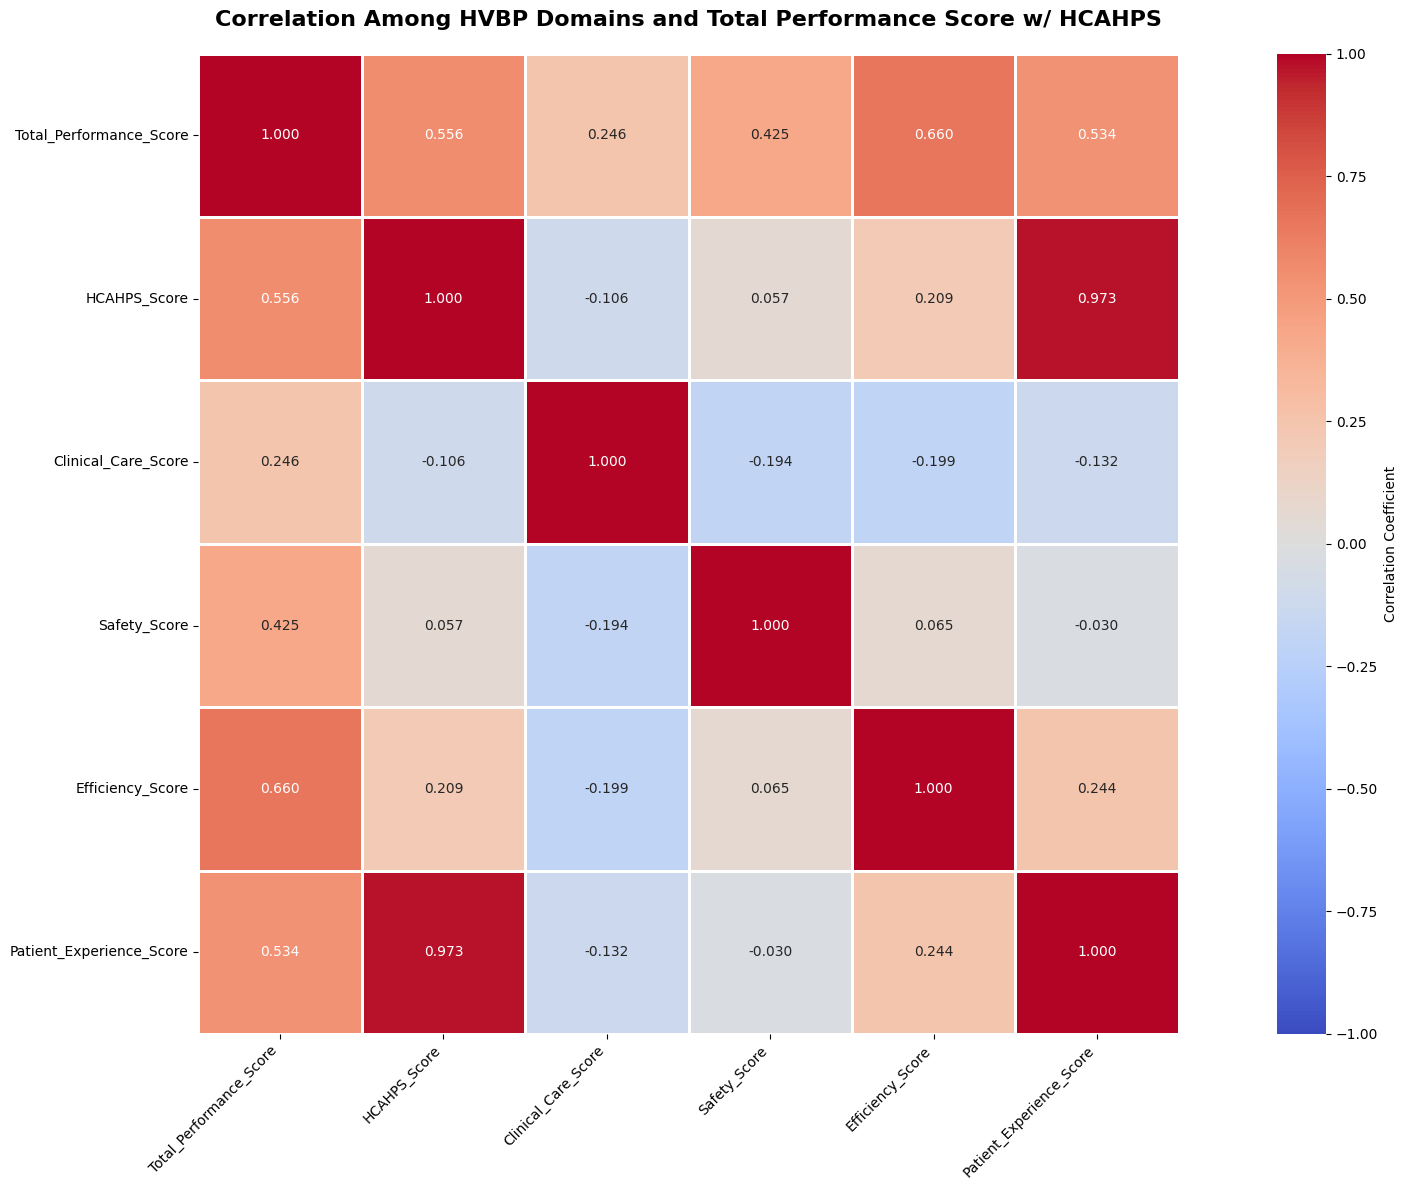

In [18]:
# Calculate correlation matrix
correlation_matrix = df_analysis_first_graph[['Total_Performance_Score', 'HCAHPS_Score', 'Clinical_Care_Score', 
                                               'Safety_Score', 'Efficiency_Score', 'Patient_Experience_Score']].corr()

# Create the heatmap
plt.figure(figsize=(20, 12))

sns.heatmap(correlation_matrix, 
            annot=True,
            fmt='.3f',
            cmap='coolwarm',
            center=0,
            square=True,
            linewidths=1,
            cbar_kws={'label': 'Correlation Coefficient'},
            vmin=-1, vmax=1)

plt.title('Correlation Among HVBP Domains and Total Performance Score w/ HCAHPS', 
          fontsize=16, fontweight='bold', pad=20)
plt.xticks(rotation=45, ha='right')
plt.yticks(rotation=0)
plt.tight_layout()
plt.show()

In the process of merging the HCAHPS dataset, we included the HCAHPS Score column alongside the Patient Experience Score. However, upon further analysis, we observed that the HCAHPS Score and Patient Experience Score serve nearly identical purposes and exhibit a high degree of overlap in their representation of patient satisfaction metrics. Including both columns in the correlation chart would introduce redundancy and potentially skew the analysis. To maintain clarity and avoid multicollinearity, we have decided to use only the Patient Experience Score for plotting the correlation chart, as it provides a more direct representation of the domain-specific metric.

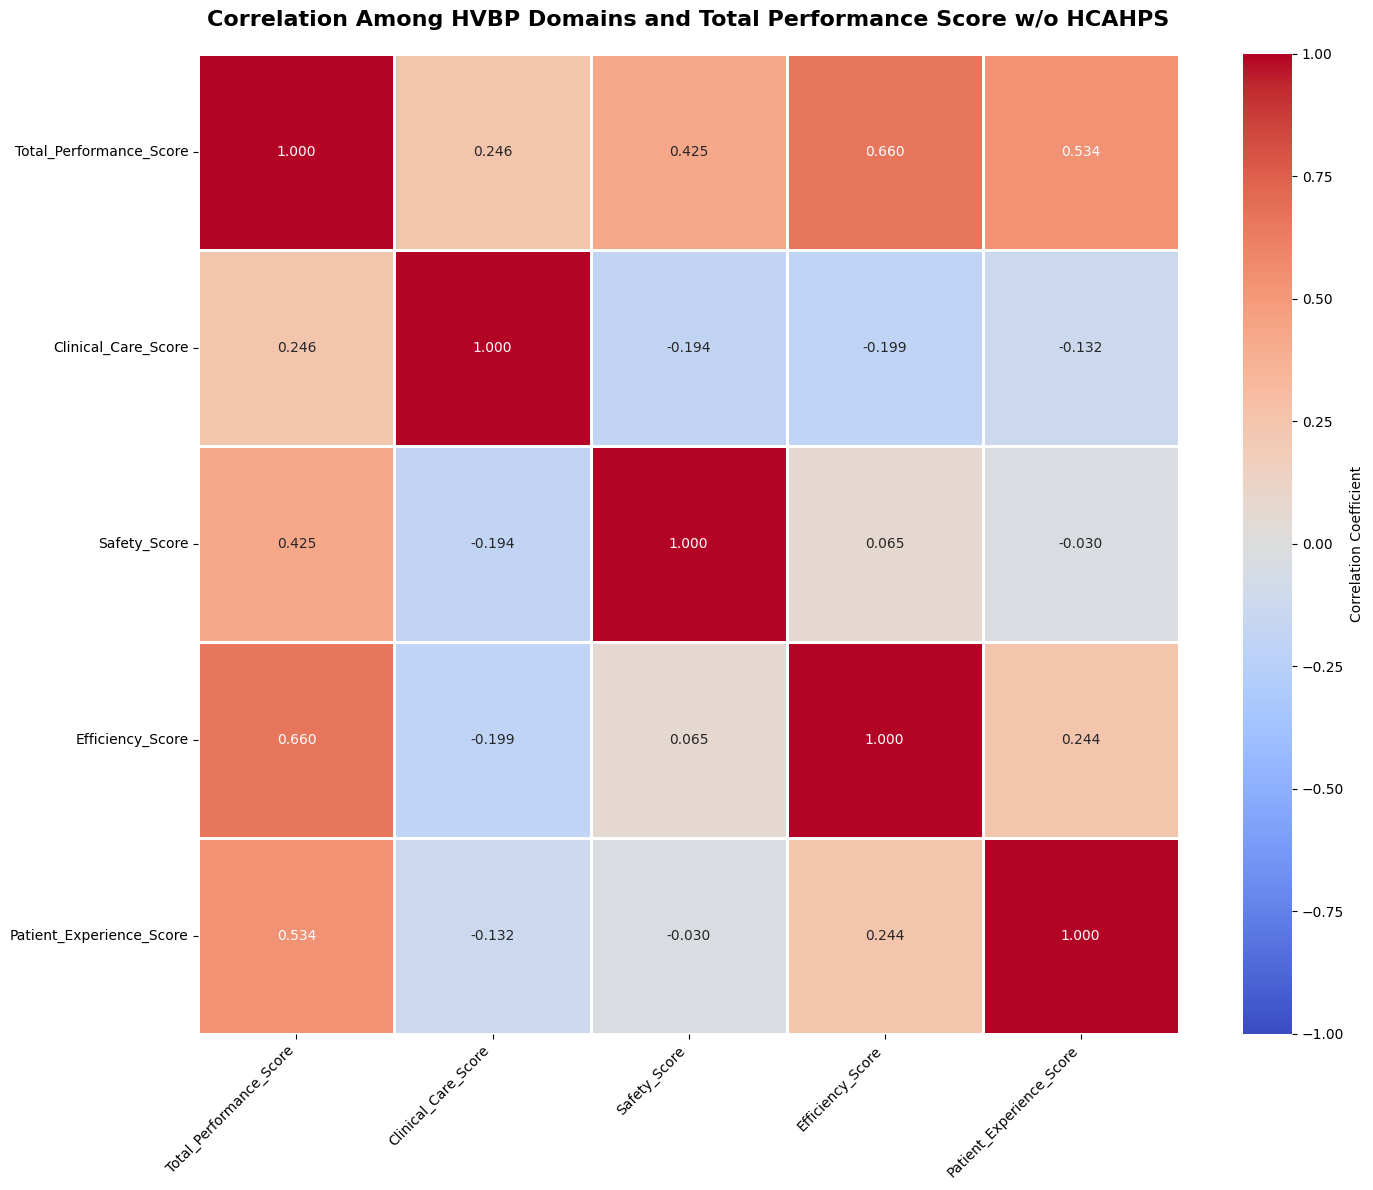

In [19]:
# Calculate correlation matrix without HCAHPS_Score
correlation_matrix = df_analysis_first_graph[['Total_Performance_Score', 'Clinical_Care_Score', 
                                               'Safety_Score', 'Efficiency_Score', 'Patient_Experience_Score']].corr()

# Create the heatmap
plt.figure(figsize=(15, 12))

sns.heatmap(correlation_matrix, 
            annot=True,
            fmt='.3f',
            cmap='coolwarm',
            center=0,
            square=True,
            linewidths=1,
            cbar_kws={'label': 'Correlation Coefficient'},
            vmin=-1, vmax=1)

plt.title('Correlation Among HVBP Domains and Total Performance Score w/o HCAHPS', 
          fontsize=16, fontweight='bold', pad=20)
plt.xticks(rotation=45, ha='right')
plt.yticks(rotation=0)
plt.tight_layout()
plt.savefig('correlation_heatmap.png', dpi=300) # Save the figure
plt.show()

### Graph 2: HCAHPS Raw Patient Satisfaction vs Weighted Patient Experience Domain Score

In [20]:
# Create dataset with complete HCAHPS and Patient Experience scores
df_analysis_second_graph = df_analysis_first_graph[['HCAHPS_Score', 'Patient_Experience_Score', 'Hospital Name']].dropna()

print(f"Hospitals with complete HCAHPS and Patient Experience data: {len(df_analysis_second_graph)}")


Hospitals with complete HCAHPS and Patient Experience data: 2800


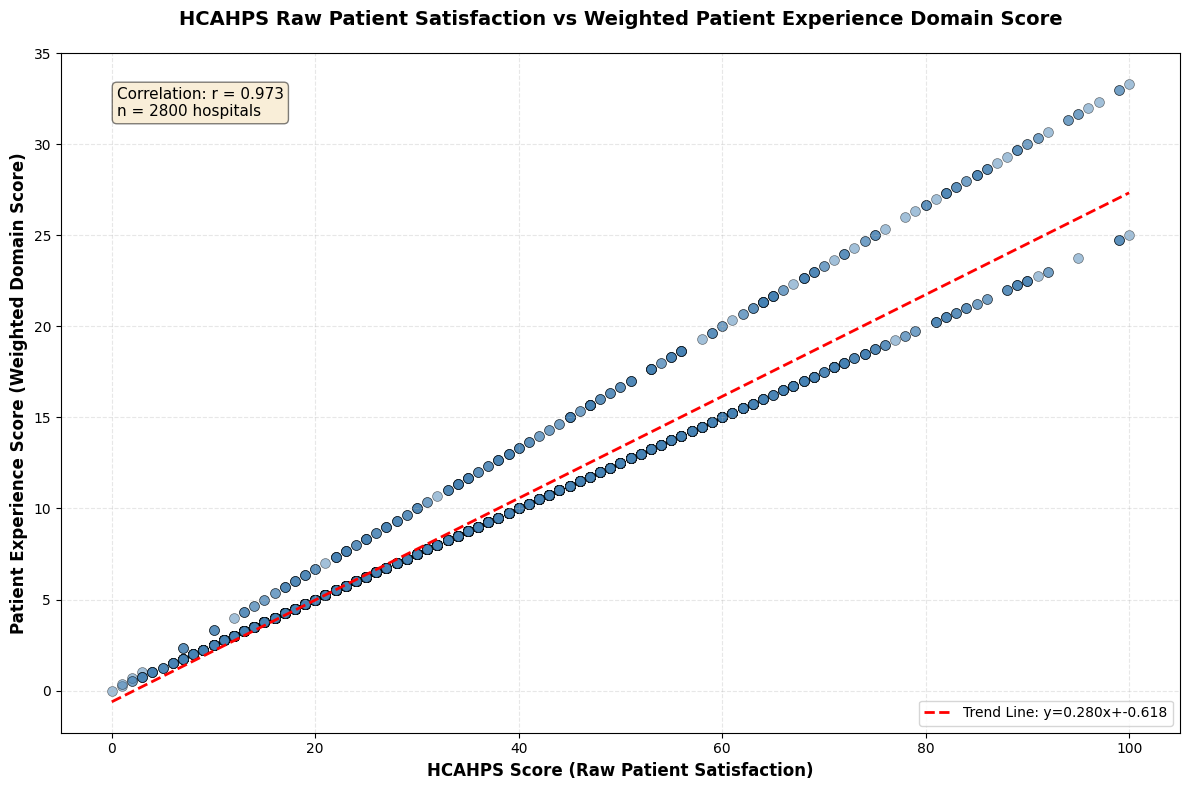


Statistical Summary:
Correlation coefficient: 0.9734

HCAHPS Score:
  Mean: 33.83
  Range: 0.00 - 100.00

Patient Experience Score:
  Mean: 8.84
  Range: 0.00 - 33.33

Trend Line Equation: y = 0.280x + -0.618
Interpretation: For every 1-point increase in HCAHPS Score,
Patient Experience Score increases by 0.280 points on average.


In [21]:
# Create the scatter plot
plt.figure(figsize=(12, 8))

# Scatter plot
plt.scatter(df_analysis_second_graph['HCAHPS_Score'], 
           df_analysis_second_graph['Patient_Experience_Score'],
           alpha=0.5,
           s=50,
           color='steelblue',
           edgecolors='black',
           linewidth=0.5)

# Calculate and plot trend line
z = np.polyfit(df_analysis_second_graph['HCAHPS_Score'], df_analysis_second_graph['Patient_Experience_Score'], 1)
p = np.poly1d(z)
x_trend = np.linspace(df_analysis_second_graph['HCAHPS_Score'].min(), df_analysis_second_graph['HCAHPS_Score'].max(), 100)
plt.plot(x_trend, p(x_trend), "r--", linewidth=2, label=f'Trend Line: y={z[0]:.3f}x+{z[1]:.3f}')

# Calculate correlation
correlation = df_analysis_second_graph['HCAHPS_Score'].corr(df_analysis_second_graph['Patient_Experience_Score'])

# Labels and title
plt.xlabel('HCAHPS Score (Raw Patient Satisfaction)', fontsize=12, fontweight='bold')
plt.ylabel('Patient Experience Score (Weighted Domain Score)', fontsize=12, fontweight='bold')
plt.title('HCAHPS Raw Patient Satisfaction vs Weighted Patient Experience Domain Score', 
          fontsize=14, fontweight='bold', pad=20)

# Add correlation text
plt.text(0.05, 0.95, f'Correlation: r = {correlation:.3f}\nn = {len(df_analysis_second_graph)} hospitals',
         transform=plt.gca().transAxes,
         fontsize=11,
         verticalalignment='top',
         bbox=dict(boxstyle='round', facecolor='wheat', alpha=0.5))

# Grid
plt.grid(True, alpha=0.3, linestyle='--')

# Legend
plt.legend(loc='lower right', fontsize=10)

plt.tight_layout()
plt.show()

# Print statistical summary
print("\nStatistical Summary:")
print("="*80)
print(f"Correlation coefficient: {correlation:.4f}")
print(f"\nHCAHPS Score:")
print(f"  Mean: {df_analysis_second_graph['HCAHPS_Score'].mean():.2f}")
print(f"  Range: {df_analysis_second_graph['HCAHPS_Score'].min():.2f} - {df_analysis_second_graph['HCAHPS_Score'].max():.2f}")
print(f"\nPatient Experience Score:")
print(f"  Mean: {df_analysis_second_graph['Patient_Experience_Score'].mean():.2f}")
print(f"  Range: {df_analysis_second_graph['Patient_Experience_Score'].min():.2f} - {df_analysis_second_graph['Patient_Experience_Score'].max():.2f}")
print(f"\nTrend Line Equation: y = {z[0]:.3f}x + {z[1]:.3f}")
print(f"Interpretation: For every 1-point increase in HCAHPS Score,")
print(f"Patient Experience Score increases by {z[0]:.3f} points on average.")

### Scatter Plot — Patient Experience Score vs Total Performance Score

Hospitals with complete data: 2807

Performance distribution:
Performance_Category
Medium Performers    1652
Low Performers       1051
High Performers       104
Name: count, dtype: int64


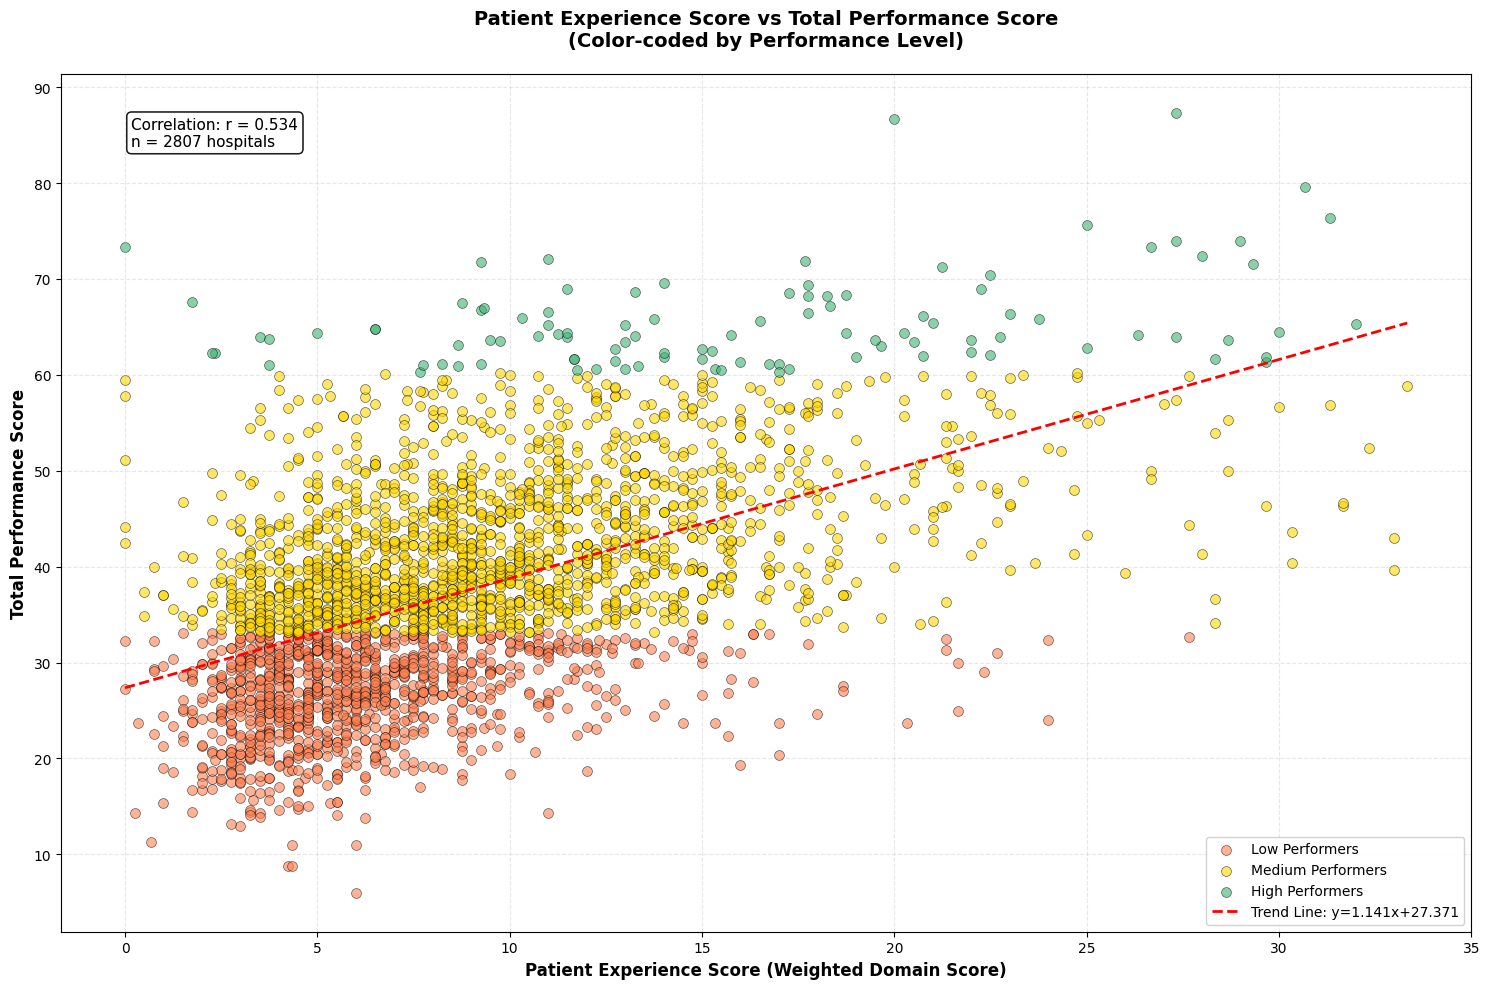

In [22]:
# Create performance categories
df_analysis_third_graph = df_analysis_first_graph[['Patient_Experience_Score', 'Total_Performance_Score', 'Hospital Name', 'State']].dropna()

# Categorize hospitals based on Total Performance Score
df_analysis_third_graph['Performance_Category'] = pd.cut(df_analysis_third_graph['Total_Performance_Score'], 
                                                    bins=3, 
                                                    labels=['Low Performers', 'Medium Performers', 'High Performers'])

print(f"Hospitals with complete data: {len(df_analysis_third_graph)}")
print(f"\nPerformance distribution:")
print(df_analysis_third_graph['Performance_Category'].value_counts())

# Create the scatter plot
plt.figure(figsize=(15, 10))

# Define colors for each category
colors_dict = {'Low Performers': 'coral', 'Medium Performers': 'gold', 'High Performers': 'mediumseagreen'}

# Plot each category separately
for category in ['Low Performers', 'Medium Performers', 'High Performers']:
    mask = df_analysis_third_graph['Performance_Category'] == category
    plt.scatter(df_analysis_third_graph[mask]['Patient_Experience_Score'], 
               df_analysis_third_graph[mask]['Total_Performance_Score'],
               alpha=0.6,
               s=50,
               color=colors_dict[category],
               edgecolors='black',
               linewidth=0.5,
               label=category)

# Calculate and plot trend line
z = np.polyfit(df_analysis_third_graph['Patient_Experience_Score'], df_analysis_third_graph['Total_Performance_Score'], 1)
p = np.poly1d(z)
x_trend = np.linspace(df_analysis_third_graph['Patient_Experience_Score'].min(), 
                      df_analysis_third_graph['Patient_Experience_Score'].max(), 100)
plt.plot(x_trend, p(x_trend), "r--", linewidth=2, label=f'Trend Line: y={z[0]:.3f}x+{z[1]:.3f}')

# Calculate correlation
correlation = df_analysis_third_graph['Patient_Experience_Score'].corr(df_analysis_third_graph['Total_Performance_Score'])


plt.text(0.05, 0.95, f'Correlation: r = {correlation:.3f}\nn = {len(df_analysis_third_graph)} hospitals',
         transform=plt.gca().transAxes,
         fontsize=11,
         verticalalignment='top',
         bbox=dict(boxstyle='round', facecolor='white', alpha=0.8))

# Labels and title
plt.xlabel('Patient Experience Score (Weighted Domain Score)', fontsize=12, fontweight='bold')
plt.ylabel('Total Performance Score', fontsize=12, fontweight='bold')
plt.title('Patient Experience Score vs Total Performance Score\n(Color-coded by Performance Level)', 
          fontsize=14, fontweight='bold', pad=20)

# Add correlation text
plt.text(0.05, 0.95, f'Correlation: r = {correlation:.3f}\nn = {len(df_analysis_third_graph)} hospitals',
         transform=plt.gca().transAxes,
         fontsize=11,
         verticalalignment='top',
         bbox=dict(boxstyle='round', facecolor='white', alpha=0.8))

# Grid
plt.grid(True, alpha=0.3, linestyle='--')

# Legend
plt.legend(loc='lower right', fontsize=10, framealpha=0.9)

plt.tight_layout()
plt.show()

### Regression Coefficient Bar Chart

Hospitals with complete data: 2807

Domain Contributions:
Safety              : Avg =  12.78, Contribution = 34.14%, Std =  5.70
Clinical Care       : Avg =  10.56, Contribution = 28.22%, Std =  6.00
Patient Experience  : Avg =   8.82, Contribution = 23.56%, Std =  5.32
Efficiency          : Avg =   5.27, Contribution = 14.09%, Std =  7.03


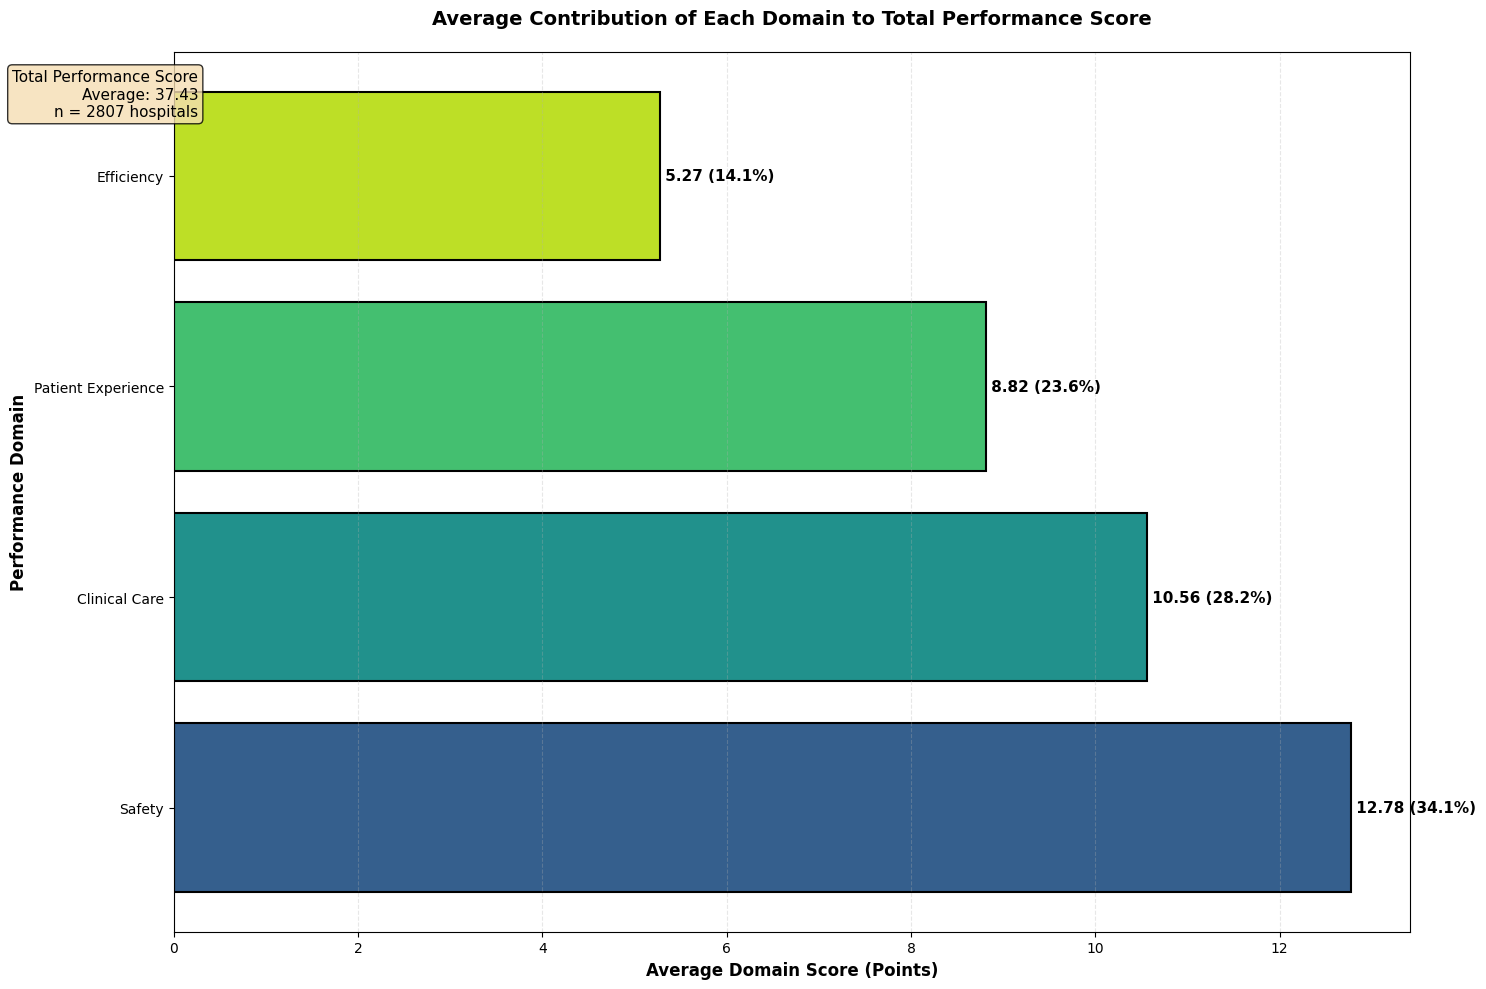

In [23]:
# Calculate the contribution of each domain to Total Performance Score
df_analysis_fourth_graph = df_analysis_first_graph[['Clinical_Care_Score', 'Patient_Experience_Score', 
                                            'Safety_Score', 'Efficiency_Score', 
                                            'Total_Performance_Score']].dropna()

print(f"Hospitals with complete data: {len(df_analysis_fourth_graph)}")

# Calculate average contribution (as percentage of total)
domain_means = {
    'Clinical Care': df_analysis_fourth_graph['Clinical_Care_Score'].mean(),
    'Patient Experience': df_analysis_fourth_graph['Patient_Experience_Score'].mean(),
    'Safety': df_analysis_fourth_graph['Safety_Score'].mean(),
    'Efficiency': df_analysis_fourth_graph['Efficiency_Score'].mean()
}

total_mean = df_analysis_fourth_graph['Total_Performance_Score'].mean()

# Calculate percentage contribution
contribution_pct = {domain: (value / total_mean) * 100 for domain, value in domain_means.items()}

# Calculate variation (standard deviation) to show which varies most
domain_std = {
    'Clinical Care': df_analysis_fourth_graph['Clinical_Care_Score'].std(),
    'Patient Experience': df_analysis_fourth_graph['Patient_Experience_Score'].std(),
    'Safety': df_analysis_fourth_graph['Safety_Score'].std(),
    'Efficiency': df_analysis_fourth_graph['Efficiency_Score'].std()
}

# Create dataframe for visualization
contrib_df = pd.DataFrame({
    'Domain': list(domain_means.keys()),
    'Average_Score': list(domain_means.values()),
    'Contribution_%': list(contribution_pct.values()),
    'Std_Dev': list(domain_std.values())
})

contrib_df = contrib_df.sort_values('Average_Score', ascending=False)

print("\nDomain Contributions:")
print("="*80)
for _, row in contrib_df.iterrows():
    print(f"{row['Domain']:20s}: Avg = {row['Average_Score']:6.2f}, Contribution = {row['Contribution_%']:5.2f}%, Std = {row['Std_Dev']:5.2f}")

# Create the bar chart
fig, ax = plt.subplots(figsize=(15, 10))

# Create horizontal bar chart with color gradient
colors = plt.cm.viridis(np.linspace(0.3, 0.9, len(contrib_df)))
bars = ax.barh(contrib_df['Domain'], contrib_df['Average_Score'], 
               color=colors,
               edgecolor='black',
               linewidth=1.5)

# Add value labels on the bars
for i, (domain, score, pct) in enumerate(zip(contrib_df['Domain'], contrib_df['Average_Score'], contrib_df['Contribution_%'])):
    ax.text(score, i, f' {score:.2f} ({pct:.1f}%)', 
            va='center', ha='left',
            fontsize=11, fontweight='bold')

# Labels and title
ax.set_xlabel('Average Domain Score (Points)', fontsize=12, fontweight='bold')
ax.set_ylabel('Performance Domain', fontsize=12, fontweight='bold')
ax.set_title('Average Contribution of Each Domain to Total Performance Score', 
             fontsize=14, fontweight='bold', pad=20)

# Add information text box (moved to top left)
info_text = f'Total Performance Score\nAverage: {total_mean:.2f}\nn = {len(df_analysis_fourth_graph)} hospitals'
ax.text(0.02, 0.98, info_text,
        transform=ax.transAxes,
        fontsize=11,
        verticalalignment='top',
        horizontalalignment='right',
        bbox=dict(boxstyle='round', facecolor='wheat', alpha=0.8))

# Grid
ax.grid(True, alpha=0.3, linestyle='--', axis='x')

plt.tight_layout()
plt.show()

In [24]:
# Step 1: Prepare data
domain_cols = ['Clinical_Care_Score', 'Safety_Score', 
               'Efficiency_Score', 'Patient_Experience_Score']

df_regression = df_analysis_first_graph[domain_cols + ['Total_Performance_Score']].dropna()

print(f"Analysis dataset: {df_regression.shape[0]} hospitals\n")

# Step 2: Calculate average contributions (descriptive)
avg_contributions = df_regression[domain_cols].mean()
total_avg = avg_contributions.sum()
pct_contributions = (avg_contributions / total_avg * 100)

# Step 3: Calculate standardized coefficients
X = df_regression[domain_cols]
y = df_regression['Total_Performance_Score']

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

model_standardized = LinearRegression()
model_standardized.fit(X_scaled, y)
std_coefs = model_standardized.coef_

# Step 4: Prepare visualization data
domains_display = ['Clinical Care', 'Safety', 'Efficiency', 'Patient Experience']
avg_vals = [avg_contributions['Clinical_Care_Score'],
            avg_contributions['Safety_Score'],
            avg_contributions['Efficiency_Score'],
            avg_contributions['Patient_Experience_Score']]
pct_vals = [pct_contributions['Clinical_Care_Score'],
            pct_contributions['Safety_Score'],
            pct_contributions['Efficiency_Score'],
            pct_contributions['Patient_Experience_Score']]

Analysis dataset: 2807 hospitals



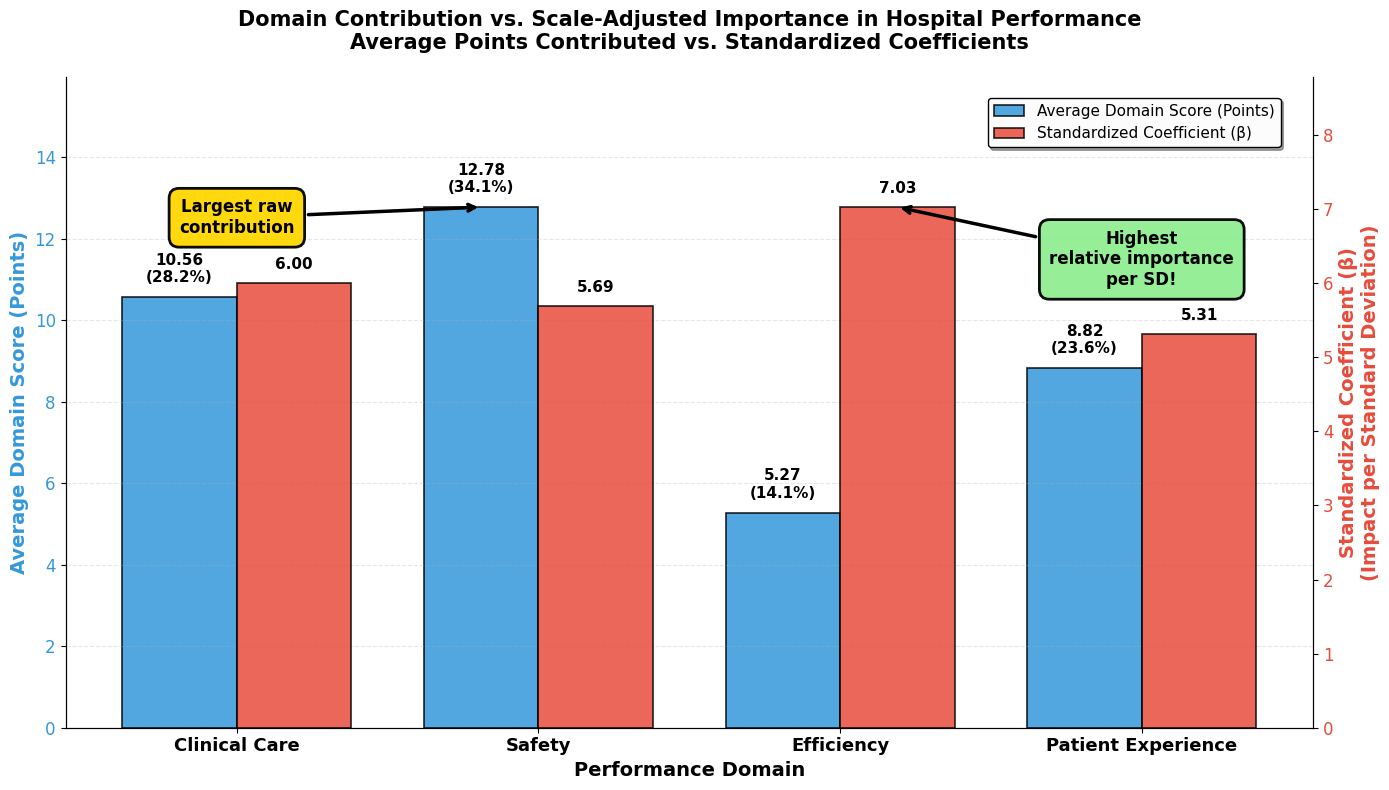

In [ ]:
# CHART 5: Contribution vs. Standardized Importance

fig, ax1 = plt.subplots(figsize=(14, 8))

x = np.arange(len(domains_display))
width = 0.38

# Primary axis - Average contribution (BLUE)
bars1 = ax1.bar(x - width/2, avg_vals, width, 
                label='Average Domain Score (Points)', 
                color='#3498db', alpha=0.85, edgecolor='black', linewidth=1.2)
ax1.set_ylabel('Average Domain Score (Points)', fontsize=14, fontweight='bold', color='#3498db')
ax1.set_xlabel('Performance Domain', fontsize=14, fontweight='bold')
ax1.set_ylim(0, max(avg_vals) * 1.25)
ax1.tick_params(axis='y', labelsize=12, labelcolor='#3498db')

# Add percentage labels on blue bars
for i, (bar, pct) in enumerate(zip(bars1, pct_vals)):
    height = bar.get_height()
    ax1.text(bar.get_x() + bar.get_width()/2, height + 0.3,
             f'{height:.2f}\n({pct:.1f}%)', 
             ha='center', va='bottom', fontsize=11, fontweight='bold')

# Secondary axis - Standardized coefficients (RED)
ax2 = ax1.twinx()
bars2 = ax2.bar(x + width/2, std_coefs, width,
                label='Standardized Coefficient (β)', 
                color='#e74c3c', alpha=0.85, edgecolor='black', linewidth=1.2)
ax2.set_ylabel('Standardized Coefficient (β)\n(Impact per Standard Deviation)', 
               fontsize=14, fontweight='bold', color='#e74c3c')
ax2.set_ylim(0, max(std_coefs) * 1.25)
ax2.tick_params(axis='y', labelsize=12, labelcolor='#e74c3c')

# Add coefficient labels on red bars
for bar, coef in zip(bars2, std_coefs):
    height = bar.get_height()
    ax2.text(bar.get_x() + bar.get_width()/2, height + 0.15,
             f'{coef:.2f}', 
             ha='center', va='bottom', fontsize=11, fontweight='bold')

# Formatting
ax1.set_xticks(x)
ax1.set_xticklabels(domains_display, fontsize=13, fontweight='bold')
ax1.spines['top'].set_visible(False)
ax2.spines['top'].set_visible(False)
ax1.grid(axis='y', alpha=0.3, linestyle='--')

# Title name
plt.title('Domain Contribution vs. Scale-Adjusted Importance in Hospital Performance\n' + 
          'Average Points Contributed vs. Standardized Coefficients',
          fontsize=15, fontweight='bold', pad=20)

# Combined legend
lines1, labels1 = ax1.get_legend_handles_labels() # Get legend from ax1
lines2, labels2 = ax2.get_legend_handles_labels() # Get legend from ax2
ax1.legend(lines1 + lines2, labels1 + labels2, 
           loc='upper right',
           fontsize=11, 
           frameon=True, 
           shadow=True,
           framealpha=0.98,
           edgecolor='black',
           fancybox=True,
           bbox_to_anchor=(0.98, 0.98))  # Fine-tune position

# Annotations with correct interpretation
max_contrib_idx = avg_vals.index(max(avg_vals))  # Index of highest average contribution
max_coef_idx = list(std_coefs).index(max(std_coefs))  # Index of highest standardized coefficient

# Annotate Safety (highest contribution)
ax1.annotate('Largest raw\ncontribution', 
             xy=(max_contrib_idx - width/2, avg_vals[max_contrib_idx]), 
             xytext=(max_contrib_idx - 1.0, max(avg_vals) * 0.95),  # Adjusted position
             arrowprops=dict(arrowstyle='->', color='black', lw=2.5),
             fontsize=12, ha='center', fontweight='bold',
             bbox=dict(boxstyle='round,pad=0.6', facecolor='#FFD700', 
                      alpha=0.95, edgecolor='black', linewidth=2))

# Annotate Efficiency (highest standardized coefficient)
ax2.annotate('Highest\nrelative importance\nper SD!', 
             xy=(max_coef_idx + width/2, std_coefs[max_coef_idx]), 
             xytext=(max_coef_idx + 1.0, max(std_coefs) * 0.85),  # Adjusted position
             arrowprops=dict(arrowstyle='->', color='black', lw=2.5),
             fontsize=12, ha='center', fontweight='bold',
             bbox=dict(boxstyle='round,pad=0.6', facecolor='#90EE90', 
                      alpha=0.95, edgecolor='black', linewidth=2))

plt.tight_layout()
plt.savefig('domain_contribution_vs_importance_corrected.png', dpi=300, bbox_inches='tight')
plt.show()

In [26]:
# Prepare data for Random Forest
df_ml = df_analysis_first_graph[['Clinical_Care_Score', 'Patient_Experience_Score', 
                                  'Safety_Score', 'Efficiency_Score', 
                                  'Total_Performance_Score']].dropna()

print(f"Hospitals with complete data for ML model: {len(df_ml)}")

# Prepare X (features) and y (target)
X = df_ml[['Clinical_Care_Score', 'Patient_Experience_Score', 'Safety_Score', 'Efficiency_Score']]
y = df_ml['Total_Performance_Score']

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

print(f"\nTraining set: {len(X_train)} hospitals")
print(f"Testing set: {len(X_test)} hospitals")

# Train Random Forest model
rf_model = RandomForestRegressor(n_estimators=100, random_state=42, max_depth=10)
rf_model.fit(X_train, y_train)

# Make predictions
y_pred = rf_model.predict(X_test)

# Calculate metrics
r2 = r2_score(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
mae = mean_absolute_error(y_test, y_pred)

print("\nModel Performance:")
print("="*80)
print(f"R² Score: {r2:.4f}")
print(f"Mean Absolute Error: {mae:.4f}")
print(f"Root Mean Squared Error: {rmse:.4f}")

# Get feature importances
feature_importance = rf_model.feature_importances_
feature_names = ['Clinical Care', 'Patient Experience', 'Safety', 'Efficiency']

# Create dataframe for visualization
importance_df = pd.DataFrame({
    'Feature': feature_names,
    'Importance': feature_importance
})

importance_df = importance_df.sort_values('Importance', ascending=True)

print("\nFeature Importances:")
print("="*80)
for feature, importance in zip(importance_df['Feature'], importance_df['Importance']):
    print(f"{feature:20s}: {importance:.4f} ({importance*100:.2f}%)")

Hospitals with complete data for ML model: 2807

Training set: 2245 hospitals
Testing set: 562 hospitals

Model Performance:
R² Score: 0.9608
Mean Absolute Error: 1.4314
Root Mean Squared Error: 2.2710

Feature Importances:
Safety              : 0.1834 (18.34%)
Clinical Care       : 0.1904 (19.04%)
Patient Experience  : 0.2029 (20.29%)
Efficiency          : 0.4233 (42.33%)


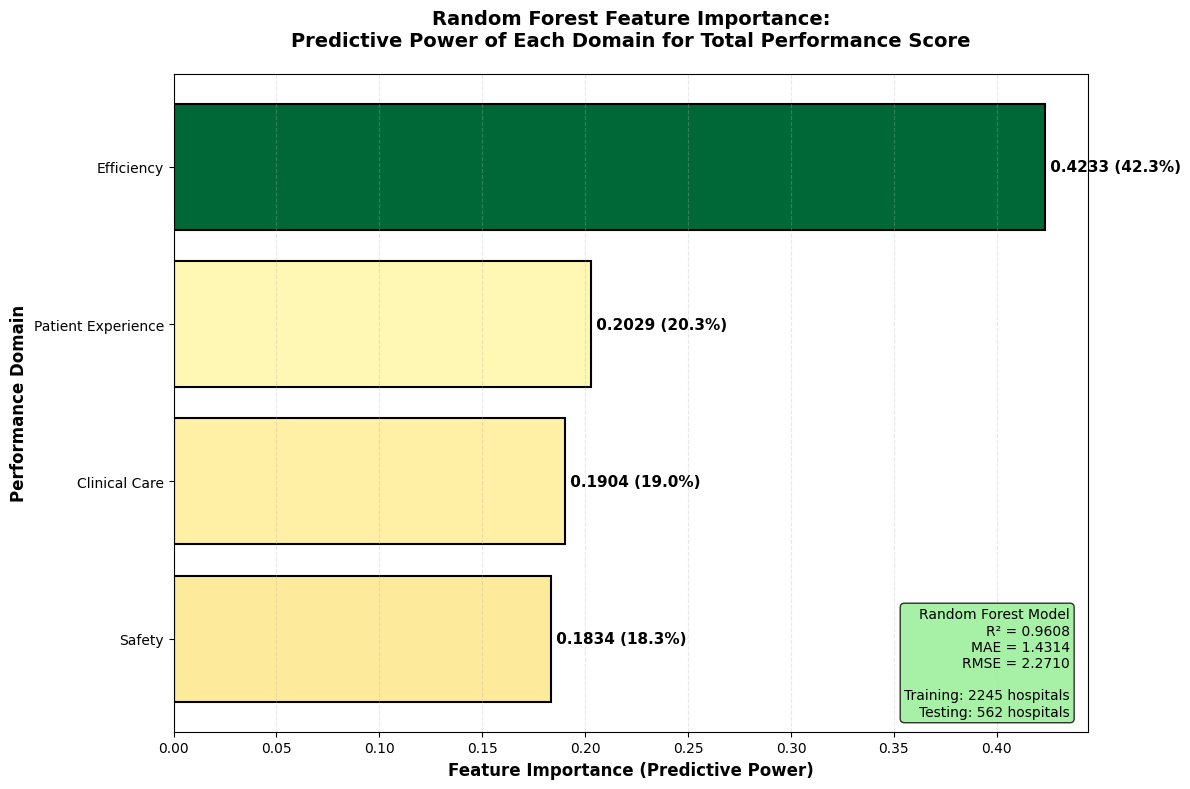

In [29]:
# Create the feature importance plot
fig, ax = plt.subplots(figsize=(12, 8))

# Color map based on importance
colors = plt.cm.RdYlGn(importance_df['Importance'] / importance_df['Importance'].max())

# Create horizontal bar chart
bars = ax.barh(importance_df['Feature'], importance_df['Importance'], 
               color=colors,
               edgecolor='black',
               linewidth=1.5)

# Add value labels on the bars
for i, (feature, importance) in enumerate(zip(importance_df['Feature'], importance_df['Importance'])):
    ax.text(importance, i, f' {importance:.4f} ({importance*100:.1f}%)', 
            va='center', ha='left',
            fontsize=11, fontweight='bold')

# Labels and title
ax.set_xlabel('Feature Importance (Predictive Power)', fontsize=12, fontweight='bold')
ax.set_ylabel('Performance Domain', fontsize=12, fontweight='bold')
ax.set_title('Random Forest Feature Importance:\nPredictive Power of Each Domain for Total Performance Score', 
             fontsize=14, fontweight='bold', pad=20)

# Add model performance text box (BOTTOM RIGHT)
info_text = f'Random Forest Model\nR² = {r2:.4f}\nMAE = {mae:.4f}\nRMSE = {rmse:.4f}\n\nTraining: {len(X_train)} hospitals\nTesting: {len(X_test)} hospitals'
ax.text(0.98, 0.02, info_text,
        transform=ax.transAxes,
        fontsize=10,
        verticalalignment='bottom',
        horizontalalignment='right',
        bbox=dict(boxstyle='round', facecolor='lightgreen', alpha=0.8))

# Grid
ax.grid(True, alpha=0.3, linestyle='--', axis='x')

plt.tight_layout()
plt.savefig('feature_importance_rf.png', dpi=300)
plt.show()

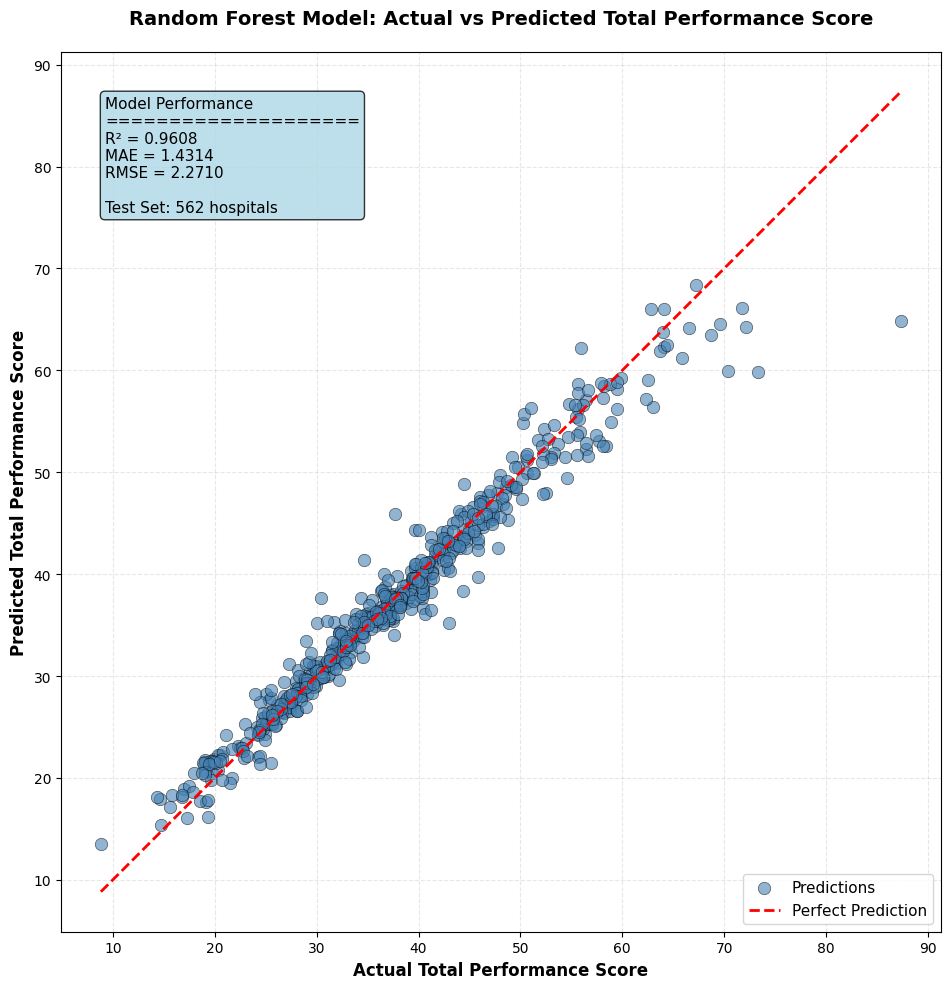


Prediction Analysis:

Actual TPS range: 8.83 to 87.33
Predicted TPS range: 13.49 to 68.41

Mean actual TPS: 37.27
Mean predicted TPS: 37.14

Best prediction:
  Actual: 24.25, Predicted: 24.26, Error: -0.01

Worst prediction:
  Actual: 87.33, Predicted: 64.86, Error: 22.47


In [30]:
# Create Actual vs Predicted scatter plot
fig, ax = plt.subplots(figsize=(10, 10))

# Scatter plot
ax.scatter(y_test, y_pred, 
          alpha=0.6,
          s=80,
          color='steelblue',
          edgecolors='black',
          linewidth=0.5,
          label='Predictions')

# Add perfect prediction line (45-degree line)
min_val = min(y_test.min(), y_pred.min())
max_val = max(y_test.max(), y_pred.max())
ax.plot([min_val, max_val], [min_val, max_val], 
        'r--', linewidth=2, label='Perfect Prediction')

# Calculate residuals for visualization
residuals = y_test - y_pred

# Labels and title
ax.set_xlabel('Actual Total Performance Score', fontsize=12, fontweight='bold')
ax.set_ylabel('Predicted Total Performance Score', fontsize=12, fontweight='bold')
ax.set_title('Random Forest Model: Actual vs Predicted Total Performance Score', 
            fontsize=14, fontweight='bold', pad=20)

# Add performance metrics text box (top left)
info_text = f'Model Performance\n' + '='*20 + f'\nR² = {r2:.4f}\nMAE = {mae:.4f}\nRMSE = {rmse:.4f}\n\nTest Set: {len(y_test)} hospitals'
ax.text(0.05, 0.95, info_text,
        transform=ax.transAxes,
        fontsize=11,
        verticalalignment='top',
        horizontalalignment='left',
        bbox=dict(boxstyle='round', facecolor='lightblue', alpha=0.8))

# Add grid
ax.grid(True, alpha=0.3, linestyle='--')

# Legend
ax.legend(loc='lower right', fontsize=11)

# Make it square
ax.set_aspect('equal', adjustable='box')

plt.tight_layout()
plt.savefig('actual_vs_predicted.png', dpi=300)
plt.show()

# Additional analysis
print("\nPrediction Analysis:")
print("="*80)
print(f"\nActual TPS range: {y_test.min():.2f} to {y_test.max():.2f}")
print(f"Predicted TPS range: {y_pred.min():.2f} to {y_pred.max():.2f}")
print(f"\nMean actual TPS: {y_test.mean():.2f}")
print(f"Mean predicted TPS: {y_pred.mean():.2f}")

# Find best and worst predictions
residuals_abs = np.abs(residuals)
best_idx = residuals_abs.argmin()
worst_idx = residuals_abs.argmax()

print(f"\nBest prediction:")
print(f"  Actual: {y_test.iloc[best_idx]:.2f}, Predicted: {y_pred[best_idx]:.2f}, Error: {residuals.iloc[best_idx]:.2f}")
print(f"\nWorst prediction:")
print(f"  Actual: {y_test.iloc[worst_idx]:.2f}, Predicted: {y_pred[worst_idx]:.2f}, Error: {residuals.iloc[worst_idx]:.2f}")